## Machine Learning Lab-4: Exploratory Data Analysis (100 marks)

In [1]:
# Run this cell to install the needed dependencies

!pip install pycountry

In [2]:
#This dataset contain information of hotel booking, We have performed exploratory data analysis in python to get insight 
#from the data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

### Import and Display the first 5 rows of the dataset (5 marks)

(You can download the dataset from Canvas. Make sure to keep the dataset in the same folder where you store this assignment file, otherwise you may get errors)

Hint: Use read_csv() to read a csv file in python

In [3]:

# Enter your code here
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data Preprocessing (10 marks)

**Make a new dataframe which is a copy of the dataset so that our original dataset remains unchanged (1 mark)**

In [4]:
# Enter your code here
df = data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**(From now on, you will be using the new dataframe which you created in the previous cell for the rest of the assignment)**

**Find the size of the dataframe (1 mark)**

In [5]:
# Enter your code here
df.shape

(119390, 32)

**Check if our data contains any missing  values (2 marks)**

In [6]:
## Find the missing value, show the total null values for each column and sort it in descending order

# Enter your code here
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

We can see that company, agent, country and children contain missing values

In [7]:
## For the missing values in company and agent, just replace them with 0

df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [8]:
## For the missing values in the country column, replace it with mode (value that appears most often)

#df['country'].fillna(data.country.mode().to_string(), inplace=True)
df['country'].fillna(data.country.mode().to_string(), inplace=True)

In [9]:
## For missing children value, replace it with rounded mean value

df['children'].fillna(round(data.children.mean()), inplace=True)

**Check if there are any rows with zero guests (No adults, children or babies)** 

In [10]:
df[(df.adults+df.babies+df.children)==0].shape

(180, 32)

In [11]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

**Find the new size of the dataframe after preprocessing (1 mark)**

In [12]:
# Enter your code here
df.shape

(119210, 32)

**Checking the datatypes of each columns in the dataset (2 marks)**

In [13]:
# Enter your code here
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Convert the datatypes into integers as some are declared floats but uses only integers**

In [14]:
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

**Check the datatypes one more time to see if the conversion has worked or not (2 marks)**

In [15]:
# Enter your code here
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Perform Exploratory Data Analysis (45 marks)

**Answer the following questions using the following functions. The answers for these questions are not present in the reference file. You need to do this yourself**

In [16]:
#This function gives the precentage of different values

def get_count(series, limit=None):  
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values,series

In [17]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

**Question-1 What is the booking ratio between resort hotel and city hotel? (15 marks) (5 marks for the code, 5 marks for the graph and 5 marks for the analysis)**

**Question-2 What is the percentage of booking for each year? (15 marks) (5 marks for the code, 5 marks for the graph and 5 marks for the analysis)**

**Question-3 How many bookings were cancelled? (15 marks) (5 marks for the code, 5 marks for the graph and 5 marks for the analysis)**

Hint: Pass the appropriate dataframe columns to the get_count() function, pass the output of get_count() to plot() function, to generate the plots. Analyze these plots to answer the questions

In [18]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Hotel:  City Hotel  | Percent:  66.4063417498532
Hotel:  Resort Hotel  | Percent:  33.5936582501468


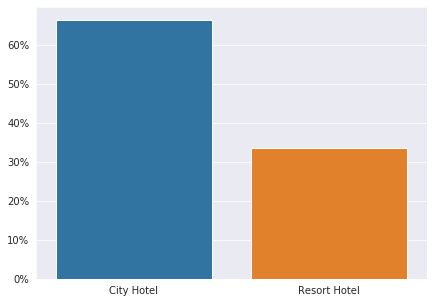

In [19]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Enter your code for question-1 here
xVal, yVal, counts = get_count(df.hotel, limit=None)
print("Hotel: ",xVal[0]," | Percent: ",yVal[0])
print("Hotel: ",xVal[1]," | Percent: ",yVal[1])

plot(x = xVal, y = yVal, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar')

Year:  2016  | Percent:  47.498532002348796
Year  2017  | Percent:  34.074322623940944
Year  2015  | Percent:  18.42714537371026


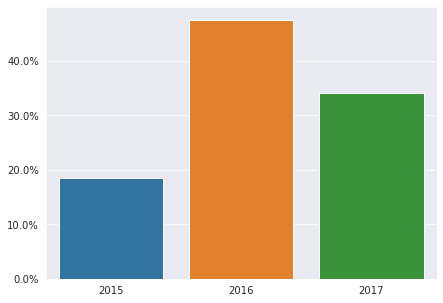

In [20]:


# Enter your code for question-2 here
xVal, yVal, count = get_count(df.arrival_date_year, limit=None)
print("Year: ",xVal[0]," | Percent: ",yVal[0])
print("Year ",xVal[1]," | Percent: ",yVal[1])
print("Year ",xVal[2]," | Percent: ",yVal[2])


plot(x = xVal, y = yVal, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar')


Reservation  Canceled  | Percent:  36.06492743897324  | No of Canceled:  42993


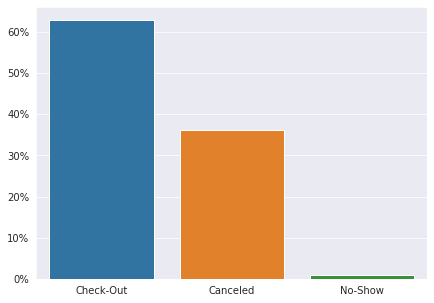

In [22]:


# Enter your code for question-3 here
xVal, yVal, count = get_count(df.reservation_status, limit=None)
print("Reservation ",xVal[1]," | Percent: ",yVal[1]," | No of Canceled: ",count[1])


plot(x = xVal, y = yVal, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar')


### Feature Selection (20 marks)

**Remove the unwanted features (10 marks)**

Use drop() to drop the unwanted features. You previously used drop() to drop some rows, but now we need to drop some columns. Make sure to keep the correct code to get marks.

The unwanted features in this dataset are:

arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, arrival_date_month, assigned_room_type, reserved_room_type, reservation_status_date, previous_cancellations, previous_bookings_not_canceled, reservation_status

Also pass axis=1

In [24]:
# Enter your code here
unwanted_columns = ["arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "arrival_date_month",
         "assigned_room_type", "reserved_room_type", "reservation_status_date", "previous_cancellations", 
         "previous_bookings_not_canceled", "reservation_status"]
df = df.drop(columns=unwanted_columns, axis = 1)

df.head()


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1


**Find the categorical values and remove them as well from the dataset (10 marks)**

In [25]:
# Find the categorical features
cat_df = df.select_dtypes(include=['object']).copy()

In [26]:
# Print the categorical features here
cat_df = list(cat_df.columns)
cat_df

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type']

Drop these columns as well since they contain categorical values and may hinder in training and testing the model

In [27]:
# Enter your code here
df = df.drop(columns=cat_df, axis = 1)
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0,0,0,3,0,0,0,0.0,0,0
1,0,737,0,0,2,0,0,0,4,0,0,0,0.0,0,0
2,0,7,0,1,1,0,0,0,0,0,0,0,75.0,0,0
3,0,13,0,1,1,0,0,0,0,304,0,0,75.0,0,0
4,0,14,0,2,2,0,0,0,0,240,0,0,98.0,0,1


In [28]:
# Print the dataframe one more time to check if these columns still exist in the dataframe
df

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0,0,0,3,0,0,0,0.00,0,0
1,0,737,0,0,2,0,0,0,4,0,0,0,0.00,0,0
2,0,7,0,1,1,0,0,0,0,0,0,0,75.00,0,0
3,0,13,0,1,1,0,0,0,0,304,0,0,75.00,0,0
4,0,14,0,2,2,0,0,0,0,240,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,2,0,0,0,0,394,0,0,96.14,0,0
119386,0,102,2,5,3,0,0,0,0,9,0,0,225.43,0,2
119387,0,34,2,5,2,0,0,0,0,9,0,0,157.71,0,4
119388,0,109,2,5,2,0,0,0,0,89,0,0,104.40,0,0


### Create decision tree models for both regression and classification (20 marks)

**Train and test the data. Use 'is_cancelled' as the target. Use training to testing ratio as 3:1 (4 marks)**

## **Side Note :**
**-- The expected values for the regression and classification were switched. The original cells were left in place. I created new ones and answered the questions there.**

In [29]:
# Define X and Y values for the train_test_split here
X = df.drop(['is_canceled'], axis=1)
Y = df['is_canceled']

In [30]:
# Use train_test_split here

from sklearn.model_selection import train_test_split

# Split 3:1 which is 0.75:0.25
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
print('X_train dimension= ', x_train.shape)
print('X_test dimension= ', x_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (89407, 14)
X_test dimension=  (29803, 14)
y_train dimension=  (89407,)
y_test dimension=  (29803,)


**Use decision tree model (regression) to test the data (4 marks)**

In [31]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(random_state=0)
clf.fit(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("Accuracy:", test_score)

Accuracy: 0.1943736012898598


**Predict the value of the 45th record in x_train (4 marks)**

In [32]:
prediction = clf.predict(x_train.iloc[45].values.reshape(1,-1))

## Actual Value of 45th record of x_train from y_train
actual_value = y_train.iloc[45]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 1.0
Actual Value		: 1


**Use decision tree model (classification) to test the data (4 marks)**

In [33]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("Accuracy:", test_score)

Accuracy: 0.8081065664530417


**Predict the value of the 75th record in x_train (4 marks)**

In [34]:
prediction = clf.predict(x_train.iloc[75].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[75]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 1
Actual Value		: 1
